In [ ]:
# First Project w/ Notebook

In [78]:
import ssl
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
# ssl settings
cntxt = ssl.create_default_context()
cntxt.check_hostname = False
cntxt.verify_mode = ssl.CERT_NONE

In [5]:
# passing the url to beautifulsoup4
url = 'https://www.cia.gov/library/publications/the-world-factbook/'
print("Opening the url")
uru = urllib.request.urlopen(url, context=cntxt)
# return the HTTP status code of the response
print("HTTP Status", uru.getcode())
# read the html
html = uru.read().decode('utf-8')
print(f"finished reading data. {len(html)} has/have been read")

Opening the url
HTTP Status 200
finished reading data. 75080 has/have been read


In [6]:
# parsing the html to beautifulsoup
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())


<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="css/publications.css" rel="stylesheet" type="text/css"/>
  <link href="css/publications-detail.css" rel="stylesheet" type="text/css"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   The World Factbook — Central Intelligence Agency
  </title>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="Apr 01, 2016" name="LastModified"/>
  <link href="css/jobcart.css" rel="stylesheet"/>
  <link href="css/smallscreen.css" rel="st

In [46]:
# Extract the country names and codes

country_codes = []
country_names = []

for tag in soup.find_all('option'):
    #print(tag.get('value')[5:7])
    country_codes.append(tag.get('value')[5:7])
    country_names.append((tag.text))

# Remove first entry 'World'
temp = country_codes.pop(0)
temp = country_names.pop(0)


In [49]:
print('Here are the countries Names\n' + '-'*28)

for country in country_names[1:]:
    print(country, end=',')
    
for country in country_codes[1:]:
    print(country, end=',')

Here are the countries Names
----------------------------
 Afghanistan , Akrotiri , Albania , Algeria , American Samoa , Andorra , Angola , Anguilla , Antarctica , Antigua and Barbuda , Arctic Ocean , Argentina , Armenia , Aruba , Ashmore and Cartier Islands , Atlantic Ocean , Australia , Austria , Azerbaijan , Bahamas, The , Bahrain , Baker Island , Bangladesh , Barbados , Belarus , Belgium , Belize , Benin , Bermuda , Bhutan , Bolivia , Bosnia and Herzegovina , Botswana , Bouvet Island , Brazil , British Indian Ocean Territory , British Virgin Islands , Brunei , Bulgaria , Burkina Faso , Burma , Burundi , Cabo Verde , Cambodia , Cameroon , Canada , Cayman Islands , Central African Republic , Chad , Chile , China , Christmas Island , Clipperton Island , Cocos (Keeling) Islands , Colombia , Comoros , Congo, Democratic Republic of the , Congo, Republic of the , Cook Islands , Coral Sea Islands , Costa Rica , Cote d'Ivoire , Croatia , Cuba , Curacao , Cyprus , Czechia , Denmark , Dhekeli

In [59]:
# Extract Demographics

# Base url
url_base = 'https://www.cia.gov/library/publications/the-world-factbook/geos/'

demographics1=[]
demographics2=[]
demographics3=[]
demographics4=[]
demographics5=[]

offset = len('65 years and over: ')

# Iterate over Contries
for i in range(1, len(country_names)-1):
    country_html = country_codes[i]+'.html'
    country_url = url_base + country_html
    
    # read the html and pass the url to beautifulsoup
    html = urllib.request.urlopen(country_url, context=cntxt)
    soup = BeautifulSoup(html, 'html.parser')
    
    
    # text part 
    txt = soup.get_text()
    pos1 = txt.find('0-14 years: ')
    pos2 = txt.find('15-24 years: ')
    pos3 = txt.find('25-54 years: ')
    pos4 = txt.find('55-64 years: ')
    pos5 = txt.find('65 years and over: ')

    if pos1 == -1:
        print(f"**0-14 years % data not found for {country_names[i]}!**")
        demographics1.append(np.nan)
    else:
        text=txt[pos1+12:pos1+18]
        end=re.search('%',text).start()
        a=float((txt[pos1+12:pos1+12+end]))
        demographics1.append(a)
        print(f"0-14 years % data extraction complete for {country_names[i]}!")
    
    if pos2==-1:
        print(f"**15-24 years % data not found for {country_names[i]}!**")
        demographics2.append(np.nan)
    else:
        text=txt[pos2+13:pos2+19]
        end=re.search('%',text).start()
        a=float((txt[pos2+13:pos2+13+end]))
        demographics2.append(a)
        print(f"15-24 years % data extraction complete for {country_names[i]}!")
        
    if pos3==-1:
        print(f"**25-54 years % data not found for {country_names[i]}!**")
        demographics3.append(np.nan)
    else:
        text=txt[pos3+13:pos3+19]
        end=re.search('%',text).start()
        a=float((txt[pos3+13:pos3+13+end]))
        demographics3.append(a)
        print(f"25-54 years % data extraction complete for {country_names[i]}!")
    
    if pos4==-1:
        print(f"**55-64 years % data not found for {country_names[i]}!**")
        demographics4.append(np.nan)
    else:
        text=txt[pos4+13:pos4+19]
        end=re.search('%',text).start()
        a=float((txt[pos4+13:pos4+13+end]))
        demographics4.append(a)
        print(f"55-64 years % data extraction complete for {country_names[i]}!")
        
    if pos5==-1:
        print(f"**65 years and beyond % data not found for {country_names[i]}!**")
        demographics5.append(np.nan)
    else:
        text=txt[pos5+offset:pos5+offset+6]
        end=re.search('%',text).start()
        a=float((txt[pos5+offset:pos5+offset+end]))
        demographics5.append(a)
        print(f"65 years and beyond % data extraction complete for {country_names[i]}!")




0-14 years % data extraction complete for  Afghanistan !
15-24 years % data extraction complete for  Afghanistan !
25-54 years % data extraction complete for  Afghanistan !
55-64 years % data extraction complete for  Afghanistan !
65 years and beyond % data extraction complete for  Afghanistan !
**0-14 years % data not found for  Akrotiri !**
**15-24 years % data not found for  Akrotiri !**
**25-54 years % data not found for  Akrotiri !**
**55-64 years % data not found for  Akrotiri !**
**65 years and beyond % data not found for  Akrotiri !**
0-14 years % data extraction complete for  Albania !
15-24 years % data extraction complete for  Albania !
25-54 years % data extraction complete for  Albania !
55-64 years % data extraction complete for  Albania !
65 years and beyond % data extraction complete for  Albania !
0-14 years % data extraction complete for  Algeria !
15-24 years % data extraction complete for  Algeria !
25-54 years % data extraction complete for  Algeria !
55-64 years %

0-14 years % data extraction complete for  Bhutan !
15-24 years % data extraction complete for  Bhutan !
25-54 years % data extraction complete for  Bhutan !
55-64 years % data extraction complete for  Bhutan !
65 years and beyond % data extraction complete for  Bhutan !
0-14 years % data extraction complete for  Bolivia !
15-24 years % data extraction complete for  Bolivia !
25-54 years % data extraction complete for  Bolivia !
55-64 years % data extraction complete for  Bolivia !
65 years and beyond % data extraction complete for  Bolivia !
0-14 years % data extraction complete for  Bosnia and Herzegovina !
15-24 years % data extraction complete for  Bosnia and Herzegovina !
25-54 years % data extraction complete for  Bosnia and Herzegovina !
55-64 years % data extraction complete for  Bosnia and Herzegovina !
65 years and beyond % data extraction complete for  Bosnia and Herzegovina !
0-14 years % data extraction complete for  Botswana !
15-24 years % data extraction complete for  B

0-14 years % data extraction complete for  Congo, Republic of the !
15-24 years % data extraction complete for  Congo, Republic of the !
25-54 years % data extraction complete for  Congo, Republic of the !
55-64 years % data extraction complete for  Congo, Republic of the !
65 years and beyond % data extraction complete for  Congo, Republic of the !
0-14 years % data extraction complete for  Cook Islands !
15-24 years % data extraction complete for  Cook Islands !
25-54 years % data extraction complete for  Cook Islands !
55-64 years % data extraction complete for  Cook Islands !
65 years and beyond % data extraction complete for  Cook Islands !
**0-14 years % data not found for  Coral Sea Islands !**
**15-24 years % data not found for  Coral Sea Islands !**
**25-54 years % data not found for  Coral Sea Islands !**
**55-64 years % data not found for  Coral Sea Islands !**
**65 years and beyond % data not found for  Coral Sea Islands !**
0-14 years % data extraction complete for  Costa 

**0-14 years % data not found for  French Southern and Antarctic Lands !**
**15-24 years % data not found for  French Southern and Antarctic Lands !**
**25-54 years % data not found for  French Southern and Antarctic Lands !**
**55-64 years % data not found for  French Southern and Antarctic Lands !**
**65 years and beyond % data not found for  French Southern and Antarctic Lands !**
0-14 years % data extraction complete for  Gabon !
15-24 years % data extraction complete for  Gabon !
25-54 years % data extraction complete for  Gabon !
55-64 years % data extraction complete for  Gabon !
65 years and beyond % data extraction complete for  Gabon !
0-14 years % data extraction complete for  Gambia, The !
15-24 years % data extraction complete for  Gambia, The !
25-54 years % data extraction complete for  Gambia, The !
55-64 years % data extraction complete for  Gambia, The !
65 years and beyond % data extraction complete for  Gambia, The !
0-14 years % data extraction complete for  Gaza S

0-14 years % data extraction complete for  Iraq !
15-24 years % data extraction complete for  Iraq !
25-54 years % data extraction complete for  Iraq !
55-64 years % data extraction complete for  Iraq !
65 years and beyond % data extraction complete for  Iraq !
0-14 years % data extraction complete for  Ireland !
15-24 years % data extraction complete for  Ireland !
25-54 years % data extraction complete for  Ireland !
55-64 years % data extraction complete for  Ireland !
65 years and beyond % data extraction complete for  Ireland !
0-14 years % data extraction complete for  Isle of Man !
15-24 years % data extraction complete for  Isle of Man !
25-54 years % data extraction complete for  Isle of Man !
55-64 years % data extraction complete for  Isle of Man !
65 years and beyond % data extraction complete for  Isle of Man !
0-14 years % data extraction complete for  Israel !
15-24 years % data extraction complete for  Israel !
25-54 years % data extraction complete for  Israel !
55-64 

0-14 years % data extraction complete for  Macau !
15-24 years % data extraction complete for  Macau !
25-54 years % data extraction complete for  Macau !
55-64 years % data extraction complete for  Macau !
65 years and beyond % data extraction complete for  Macau !
0-14 years % data extraction complete for  Macedonia !
15-24 years % data extraction complete for  Macedonia !
25-54 years % data extraction complete for  Macedonia !
55-64 years % data extraction complete for  Macedonia !
65 years and beyond % data extraction complete for  Macedonia !
0-14 years % data extraction complete for  Madagascar !
15-24 years % data extraction complete for  Madagascar !
25-54 years % data extraction complete for  Madagascar !
55-64 years % data extraction complete for  Madagascar !
65 years and beyond % data extraction complete for  Madagascar !
0-14 years % data extraction complete for  Malawi !
15-24 years % data extraction complete for  Malawi !
25-54 years % data extraction complete for  Malaw

0-14 years % data extraction complete for  Niger !
15-24 years % data extraction complete for  Niger !
25-54 years % data extraction complete for  Niger !
55-64 years % data extraction complete for  Niger !
65 years and beyond % data extraction complete for  Niger !
0-14 years % data extraction complete for  Nigeria !
15-24 years % data extraction complete for  Nigeria !
25-54 years % data extraction complete for  Nigeria !
55-64 years % data extraction complete for  Nigeria !
65 years and beyond % data extraction complete for  Nigeria !
**0-14 years % data not found for  Niue !**
**15-24 years % data not found for  Niue !**
**25-54 years % data not found for  Niue !**
**55-64 years % data not found for  Niue !**
**65 years and beyond % data not found for  Niue !**
**0-14 years % data not found for  Norfolk Island !**
**15-24 years % data not found for  Norfolk Island !**
**25-54 years % data not found for  Norfolk Island !**
**55-64 years % data not found for  Norfolk Island !**
**65 

0-14 years % data extraction complete for  Saint Martin !
15-24 years % data extraction complete for  Saint Martin !
25-54 years % data extraction complete for  Saint Martin !
55-64 years % data extraction complete for  Saint Martin !
65 years and beyond % data extraction complete for  Saint Martin !
0-14 years % data extraction complete for  Saint Pierre and Miquelon !
15-24 years % data extraction complete for  Saint Pierre and Miquelon !
25-54 years % data extraction complete for  Saint Pierre and Miquelon !
55-64 years % data extraction complete for  Saint Pierre and Miquelon !
65 years and beyond % data extraction complete for  Saint Pierre and Miquelon !
0-14 years % data extraction complete for  Saint Vincent and the Grenadines !
15-24 years % data extraction complete for  Saint Vincent and the Grenadines !
25-54 years % data extraction complete for  Saint Vincent and the Grenadines !
55-64 years % data extraction complete for  Saint Vincent and the Grenadines !
65 years and bey

0-14 years % data extraction complete for  Switzerland !
15-24 years % data extraction complete for  Switzerland !
25-54 years % data extraction complete for  Switzerland !
55-64 years % data extraction complete for  Switzerland !
65 years and beyond % data extraction complete for  Switzerland !
0-14 years % data extraction complete for  Syria !
15-24 years % data extraction complete for  Syria !
25-54 years % data extraction complete for  Syria !
55-64 years % data extraction complete for  Syria !
65 years and beyond % data extraction complete for  Syria !
0-14 years % data extraction complete for  Taiwan !
15-24 years % data extraction complete for  Taiwan !
25-54 years % data extraction complete for  Taiwan !
55-64 years % data extraction complete for  Taiwan !
65 years and beyond % data extraction complete for  Taiwan !
0-14 years % data extraction complete for  Tajikistan !
15-24 years % data extraction complete for  Tajikistan !
25-54 years % data extraction complete for  Tajikis

**0-14 years % data not found for  Wake Island !**
**15-24 years % data not found for  Wake Island !**
**25-54 years % data not found for  Wake Island !**
**55-64 years % data not found for  Wake Island !**
**65 years and beyond % data not found for  Wake Island !**
0-14 years % data extraction complete for  Wallis and Futuna !
15-24 years % data extraction complete for  Wallis and Futuna !
25-54 years % data extraction complete for  Wallis and Futuna !
55-64 years % data extraction complete for  Wallis and Futuna !
65 years and beyond % data extraction complete for  Wallis and Futuna !
0-14 years % data extraction complete for  West Bank !
15-24 years % data extraction complete for  West Bank !
25-54 years % data extraction complete for  West Bank !
55-64 years % data extraction complete for  West Bank !
65 years and beyond % data extraction complete for  West Bank !
0-14 years % data extraction complete for  Western Sahara !
15-24 years % data extraction complete for  Western Sahara 

In [61]:
# Listing Demographics with Pandas

data = {
    '0-14 years %' : demographics1,
    '15-24 years %':demographics2,
    '25-54 years %':demographics3,
    '55-64 years %':demographics4,
    '65 years and over %':demographics5
}

df_demograph = pd.DataFrame(data=data, index=country_names[1:len(country_names)-1])
df_demograph.index.name = 'Country'
df_demograph.dropna(inplace=True)
df_demograph






,0-14 years %,15-24 years %,25-54 years %,55-64 years %,65 years and over %
Country,,,,,
Afghanistan,40.92,22.22,30.35,3.92,2.59
Albania,18.05,17.47,41.06,11.54,11.89
Algeria,29.31,15.30,42.93,6.81,5.65
American Samoa,30.28,18.79,36.38,8.58,5.97
Andorra,14.40,9.64,46.18,14.16,15.61
Angola,48.12,18.25,28.03,3.26,2.34
Anguilla,22.21,14.08,43.82,11.06,8.84
Antigua and Barbuda,23.09,16.83,42.19,9.83,8.06
Argentina,24.59,15.28,39.38,9.13,11.62


In [67]:
# Save the Data in an excel file

# Save Dataframe to excel
writer = pd.ExcelWriter('Demographics.xlsx', engine='xlsxwriter')
df_demograph.to_excel(writer, 'All_Countries_Demographics')
writer.save()



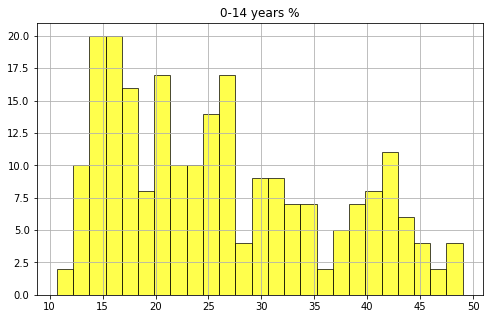

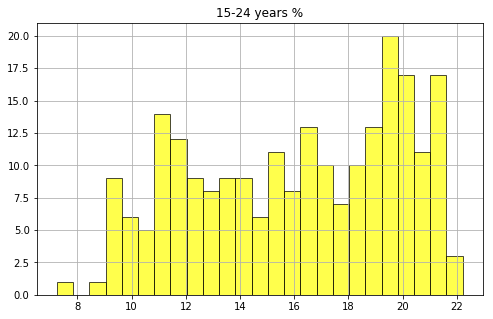

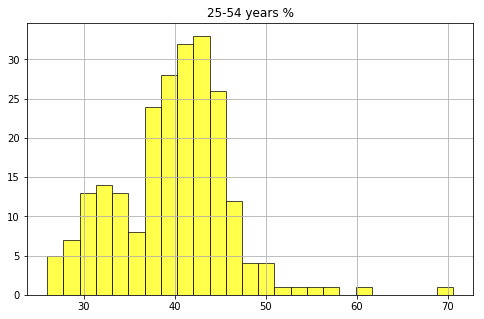

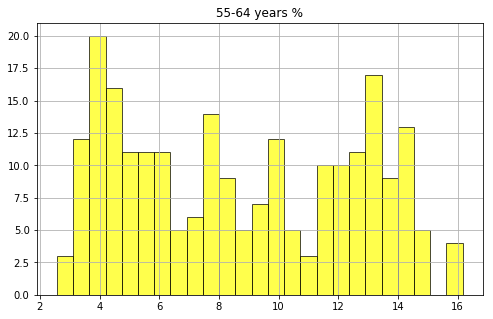

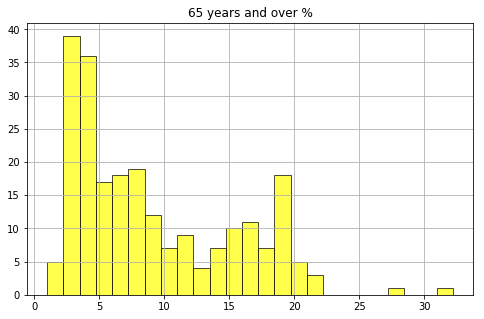

In [69]:
# Plotting

for i in range(5):
    df_demograph.hist(df_demograph.columns[i], bins=25, figsize=(8,5), color='yellow', edgecolor='k', alpha=0.7)
    plt.show()
    

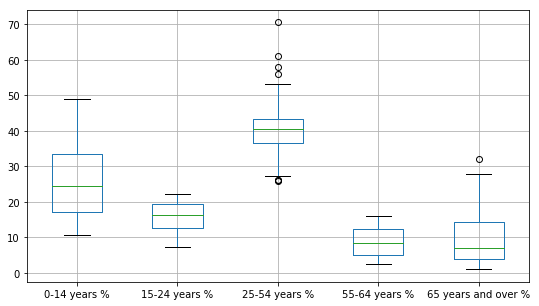

In [75]:
df_demograph.boxplot(figsize=(9,5))
plt.show()

In [76]:
# Download all Text Data

# Base url
url_base = 'https://www.cia.gov/library/publications/the-world-factbook/geos/'
# Data Dict
text_data = dict()

# Iterate over Contries
for i in range(1, len(country_names)-1):
    country_html = country_codes[i]+'.html'
    country_url = url_base + country_html
    
    # read the html and pass the url to beautifulsoup
    html = urllib.request.urlopen(country_url, context=cntxt)
    soup = BeautifulSoup(html, 'html.parser')
    
    
    # text part 
    txt = soup.get_text()
    text_data[country_names[i]] = txt
    print("Finished loading data for {country_names[i]}")
    
print("\n**Finished downloading all text data!**")
    





Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished l

Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished loading data for {country_names[i]}
Finished l

In [79]:
# Save in a pickle file for easy later access

pickle.dump(text_data, open('text_data_Factbook', 'wb'))
text_data = pickle.load(open('text_data_Factbook', 'rb'))


In [82]:
average = 0
total = 0
for k,v in text_data.items():
    total += len(v)
print("Total length:", total)
average = total / len(text_data)
print("Average length:", average)


Total length: 12456212
Average length: 46827.86466165414


In [84]:
text_data.keys()

dict_keys([' Afghanistan ', ' Akrotiri ', ' Albania ', ' Algeria ', ' American Samoa ', ' Andorra ', ' Angola ', ' Anguilla ', ' Antarctica ', ' Antigua and Barbuda ', ' Arctic Ocean ', ' Argentina ', ' Armenia ', ' Aruba ', ' Ashmore and Cartier Islands ', ' Atlantic Ocean ', ' Australia ', ' Austria ', ' Azerbaijan ', ' Bahamas, The ', ' Bahrain ', ' Baker Island ', ' Bangladesh ', ' Barbados ', ' Belarus ', ' Belgium ', ' Belize ', ' Benin ', ' Bermuda ', ' Bhutan ', ' Bolivia ', ' Bosnia and Herzegovina ', ' Botswana ', ' Bouvet Island ', ' Brazil ', ' British Indian Ocean Territory ', ' British Virgin Islands ', ' Brunei ', ' Bulgaria ', ' Burkina Faso ', ' Burma ', ' Burundi ', ' Cabo Verde ', ' Cambodia ', ' Cameroon ', ' Canada ', ' Cayman Islands ', ' Central African Republic ', ' Chad ', ' Chile ', ' China ', ' Christmas Island ', ' Clipperton Island ', ' Cocos (Keeling) Islands ', ' Colombia ', ' Comoros ', ' Congo, Democratic Republic of the ', ' Congo, Republic of the ', '

In [86]:
# Converting "string and comma" to a float

def convert_to_float(string):
    if string.isnumeric():
        return float(string)
    if string[0].isdigit():
        if ',' not in string and '.' in string:
            return float(string)
        if ',' not in string and '.' not in string:
            idx = string.find(' ')
            result = string[:idx]
            return float(result)
        idx1 = string.find(',')
        idx2 = string.find(' ')
        result = string[:idx1] + string[idx1+1:idx2]
        return float(result)
    else:
        return (-1)
     

In [ ]:
# Extract GDP (purchasing power parity) in Billion

# Dict for the Data
GDP_PPP = {}

# Iterate over countries
for i in range(1, len(country_names[i])-1):
    country = country_names[i]
    txt = text_data[country]
    pos = txt.find('GDP (purchasing power parity):')
    if pos != -1:
        pos += len('GDP (purchasing power parity):')
        string = txt[pos+1:pos+15]




